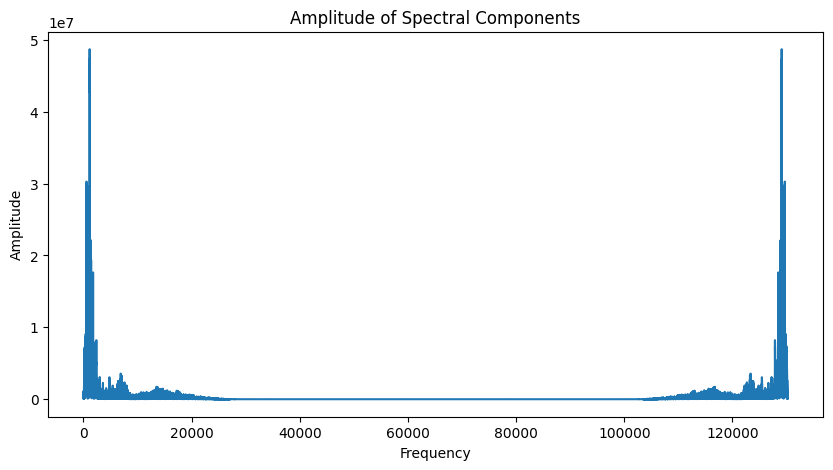

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the speech signal
file_path = '/content/AI_IN_SP_AUDIO_RECORDING.wav'
sample_rate, speech_signal = wavfile.read(file_path)

# Perform FFT to transform to frequency domain
spectral_components = np.fft.fft(speech_signal)

# Plot the amplitude part of the spectral components
plt.figure(figsize=(10, 5))
plt.plot(np.abs(spectral_components))
plt.title('Amplitude of Spectral Components')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# Inverse transform to time domain signal
time_domain_signal = np.fft.ifft(spectral_components)


Low Pass Filtered Signal:


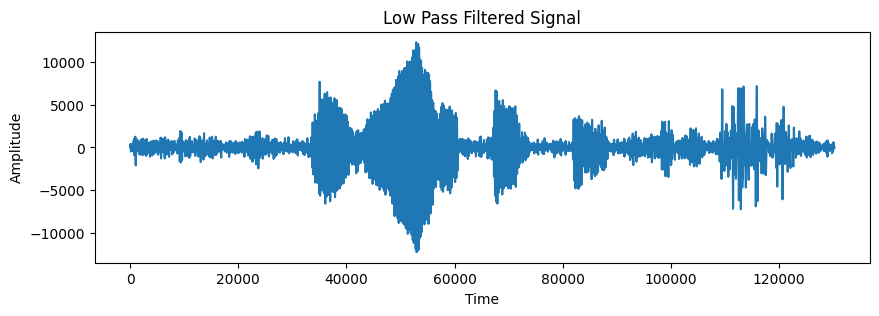

Band Pass Filtered Signal:


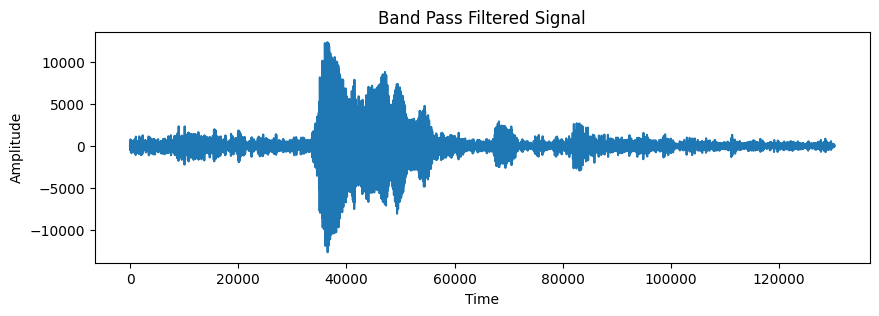

High Pass Filtered Signal:


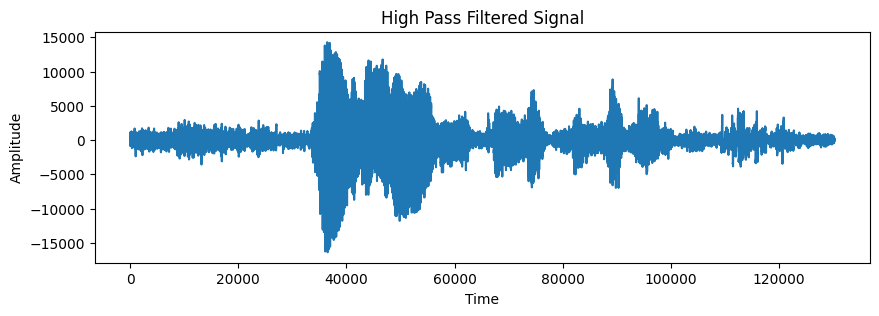

In [6]:
# Define frequency components
low_freq = 1000  # Set your desired low-frequency cutoff
high_freq = 3000  # Set your desired high-frequency cutoff

# Apply rectangular window for low pass
rectangular_window = np.zeros_like(spectral_components)
rectangular_window[:low_freq] = 1
rectangular_window[-low_freq:] = 1
filtered_spectrum_low = spectral_components * rectangular_window

# Apply rectangular window for band pass
rectangular_window_band = np.zeros_like(spectral_components)
rectangular_window_band[low_freq:high_freq] = 1
filtered_spectrum_band = spectral_components * rectangular_window_band

# Apply rectangular window for high pass
rectangular_window_high = np.zeros_like(spectral_components)
rectangular_window_high[high_freq:] = 1
filtered_spectrum_high = spectral_components * rectangular_window_high

# Inverse transform to time domain signals
filtered_signal_low = np.fft.ifft(filtered_spectrum_low)
filtered_signal_band = np.fft.ifft(filtered_spectrum_band)
filtered_signal_high = np.fft.ifft(filtered_spectrum_high)


# Print output for low pass
print("Low Pass Filtered Signal:")
plt.figure(figsize=(10, 3))
plt.plot(np.real(filtered_signal_low))
plt.title('Low Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Print output for band pass
print("Band Pass Filtered Signal:")
plt.figure(figsize=(10, 3))
plt.plot(np.real(filtered_signal_band))
plt.title('Band Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Print output for high pass
print("High Pass Filtered Signal:")
plt.figure(figsize=(10, 3))
plt.plot(np.real(filtered_signal_high))
plt.title('High Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


Cosine Window Filtered Signal:


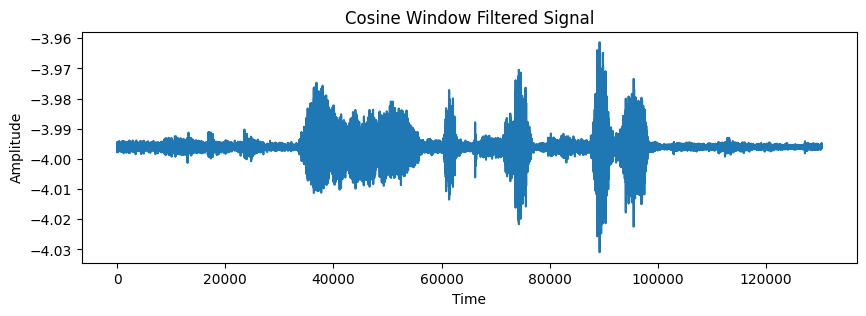

Gaussian Window Band Pass Filtered Signal:


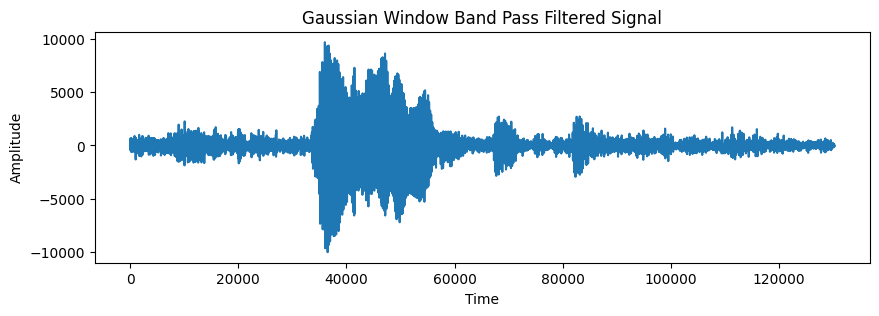

Gaussian Window High Pass Filtered Signal:


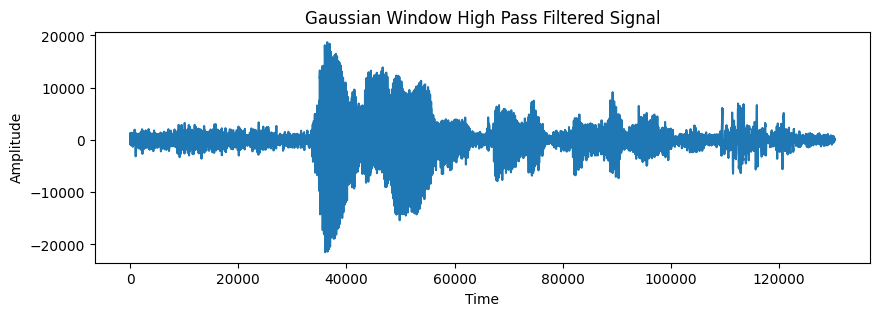

In [7]:
# Apply cosine window for low pass
cosine_window = np.cos(np.linspace(0, np.pi, len(spectral_components)))
filtered_spectrum_cosine_low = spectral_components * cosine_window

# Apply Gaussian window for band pass
gaussian_window = np.exp(-0.5 * ((np.arange(len(spectral_components)) - (low_freq + high_freq) / 2) / 1000)**2)
filtered_spectrum_gaussian_band = spectral_components * gaussian_window

# Apply Gaussian window for high pass
filtered_spectrum_gaussian_high = spectral_components * (1 - gaussian_window)

# Inverse transform to time domain signals
filtered_signal_cosine_low = np.fft.ifft(filtered_spectrum_cosine_low)
filtered_signal_gaussian_band = np.fft.ifft(filtered_spectrum_gaussian_band)
filtered_signal_gaussian_high = np.fft.ifft(filtered_spectrum_gaussian_high)


# Print output for cosine window
print("Cosine Window Filtered Signal:")
plt.figure(figsize=(10, 3))
plt.plot(np.real(filtered_signal_cosine_low))
plt.title('Cosine Window Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Print output for Gaussian window (band pass)
print("Gaussian Window Band Pass Filtered Signal:")
plt.figure(figsize=(10, 3))
plt.plot(np.real(filtered_signal_gaussian_band))
plt.title('Gaussian Window Band Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Print output for Gaussian window (high pass)
print("Gaussian Window High Pass Filtered Signal:")
plt.figure(figsize=(10, 3))
plt.plot(np.real(filtered_signal_gaussian_high))
plt.title('Gaussian Window High Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
